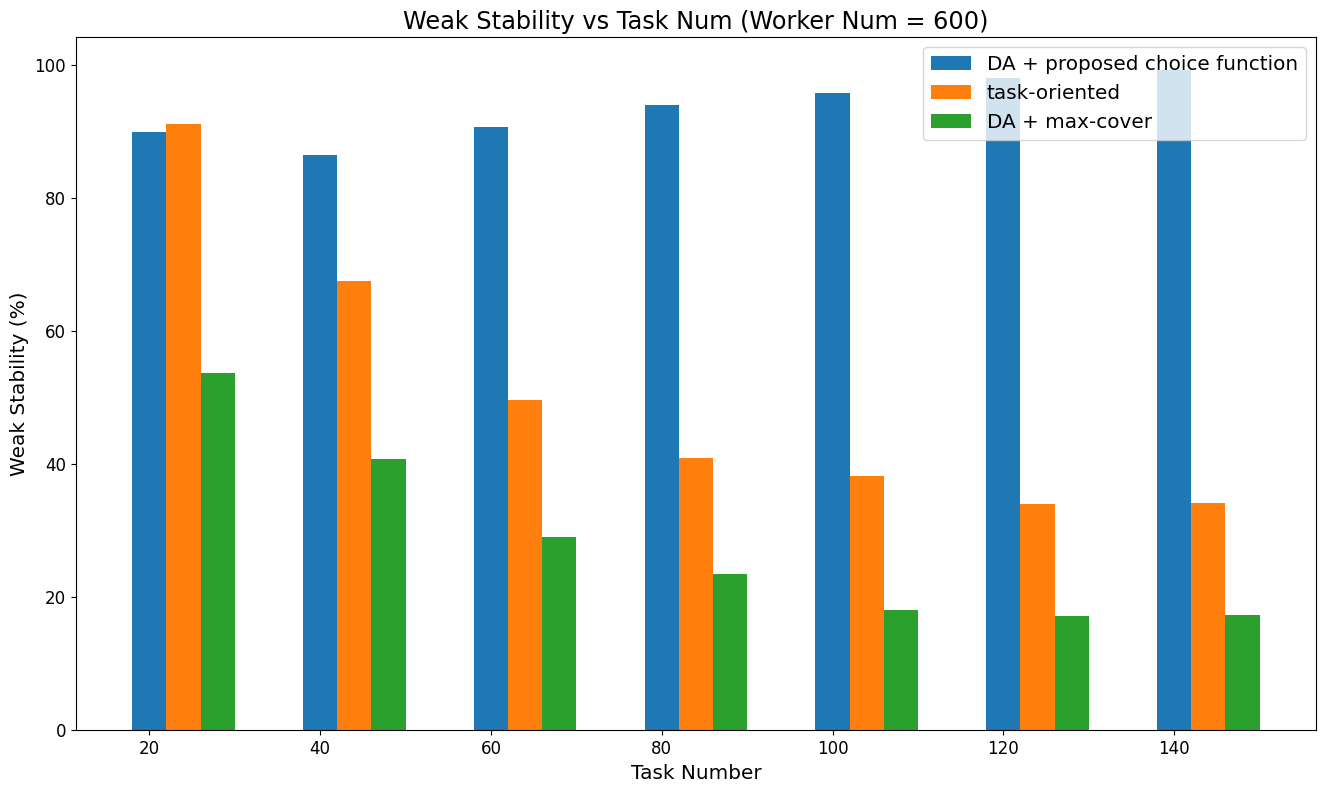

In [109]:
import pandas as pd

worker_num = 600

df = pd.read_csv('./result/dash_result.csv')
df = df[df['worker']== worker_num]
df1 = df.groupby(['method','task'])['fairness-pairwise'].agg(['mean','max','min']).reset_index()
import numpy as np
import matplotlib.pyplot as plt

methods = ['budget','heuristic','max-cover',]
labels = ['DA + proposed choice function','task-oriented','DA + max-cover']
bar_width = 0.2

# 设置位置偏移，以便将直方图居中显示
bar_positions = range(len(df1['task'].unique()))
# 绘制折线图
plt.figure(figsize=(16, 9))
x_labels = [20,40,60,80,100,120,140]
plt.xticks(bar_positions,x_labels,fontsize='large')
plt.yticks(fontsize='large')

for i,method in enumerate(methods):
    method_data = df1[df1['method'] == method]
    current_bar_positions = [pos + i * bar_width for pos in bar_positions]
    plt.bar(current_bar_positions, method_data['mean']*100,width = bar_width,label=labels[i])

# 添加标签和图例
plt.xlabel('Task Number',fontsize='x-large') 
plt.ylabel('Weak Stability (%)',fontsize='x-large')
plt.title('Weak Stability vs Task Num (Worker Num = {})'.format(worker_num),fontsize='xx-large')
plt.legend(fontsize='x-large')

# 显示图形
plt.show()

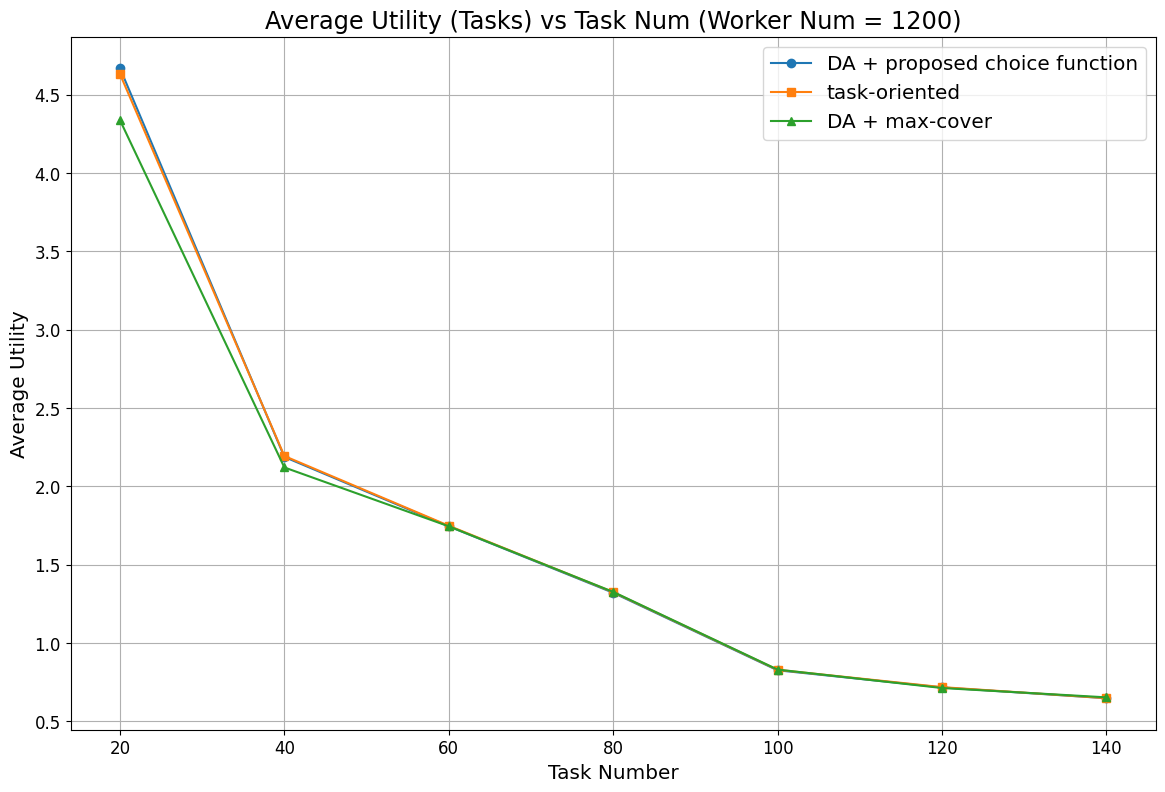

In [110]:
worker_num = 1200
df = pd.read_csv('./result/dash_result.csv')
df = df[df['worker']== worker_num]
df2 = df.groupby(['method','task'])['avg-quality'].agg(['mean','max','min']).reset_index()
import matplotlib.pyplot as plt

methods = ['budget','heuristic','max-cover',]
labels = ['DA + proposed choice function','task-oriented','DA + max-cover']
markers = ['o','s','^']

# 设置位置偏移，以便将直方图居中显示
bar_positions = range(len(df2['task'].unique()))
# 绘制折线图
plt.figure(figsize=(14, 9))
x_labels = [20,40,60,80,100,120,140]
plt.xticks(x_labels,fontsize='large')
plt.yticks(fontsize='large')

for i,method in enumerate(methods):
    method_data = df2[df2['method'] == method]
    current_bar_positions = [pos + i * bar_width for pos in bar_positions]
    plt.plot(x_labels,method_data['mean'],marker=markers[i],label=labels[i])

# 添加标签和图例
plt.xlabel('Task Number',fontsize = 'x-large')
plt.ylabel('Average Utility',fontsize = 'x-large')
plt.title('Average Utility (Tasks) vs Task Num (Worker Num = {})'.format(worker_num),fontsize = 'xx-large')
plt.legend(fontsize='x-large')

# 显示图形
plt.grid(True)
plt.show()